# Analysis of the rent dataset

## Overview

Before we start analyzing the data and explaining our intentions, we need to get an overview of the existing data. No matter what we later want to do, we have to clean and prepocess our data in order to work with it 

### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.api.types import is_object_dtype
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../data/testlizenz-tuebingen-dataliteracy4students_1706088512814.csv", sep=";", encoding='unicode_escape')
df.count() 

angebot_id                    106720
anz_parken                     50795
anz_zimmer                    106517
aus_alarmanlage_janein        106720
aus_bad_dusche_janein         106720
                               ...  
oeig_dachgeschoss_janein      106720
enddate                       105945
aus_balkon_terrasse_janein    106720
aus_wintergarten_janein       106720
aus_garten_eigen_janein       106720
Length: 86, dtype: int64

In [3]:
# include year column
df['year'] = df['startdate'].str[:4] 

In [4]:
df["month"] = pd.DatetimeIndex(df['startdate']).month

### How many houses and flats are in the dataset?

In [10]:
grouped_df = df.groupby(["oadr_ort","objekttyp_grob", "objekttyp_fein"]).size().reset_index(name='count')
grouped_df

,oadr_ort,objekttyp_grob,objekttyp_fein,count
0,Reutlingen,Wohnung,1-Z-Whg,1391
1,Reutlingen,Wohnung,2-Z-Whg,3345
2,Reutlingen,Wohnung,3-Z-Whg,3141
3,Reutlingen,Wohnung,4+-Z-Whg,315
4,Reutlingen,Wohnung,4-Z-Whg,1395
5,Reutlingen,Wohnung,kA-Z-Whg,12
6,Stuttgart,Wohnung,1-Z-Whg,12459
7,Stuttgart,Wohnung,2-Z-Whg,29190
8,Stuttgart,Wohnung,3-Z-Whg,32487
9,Stuttgart,Wohnung,4+-Z-Whg,2748


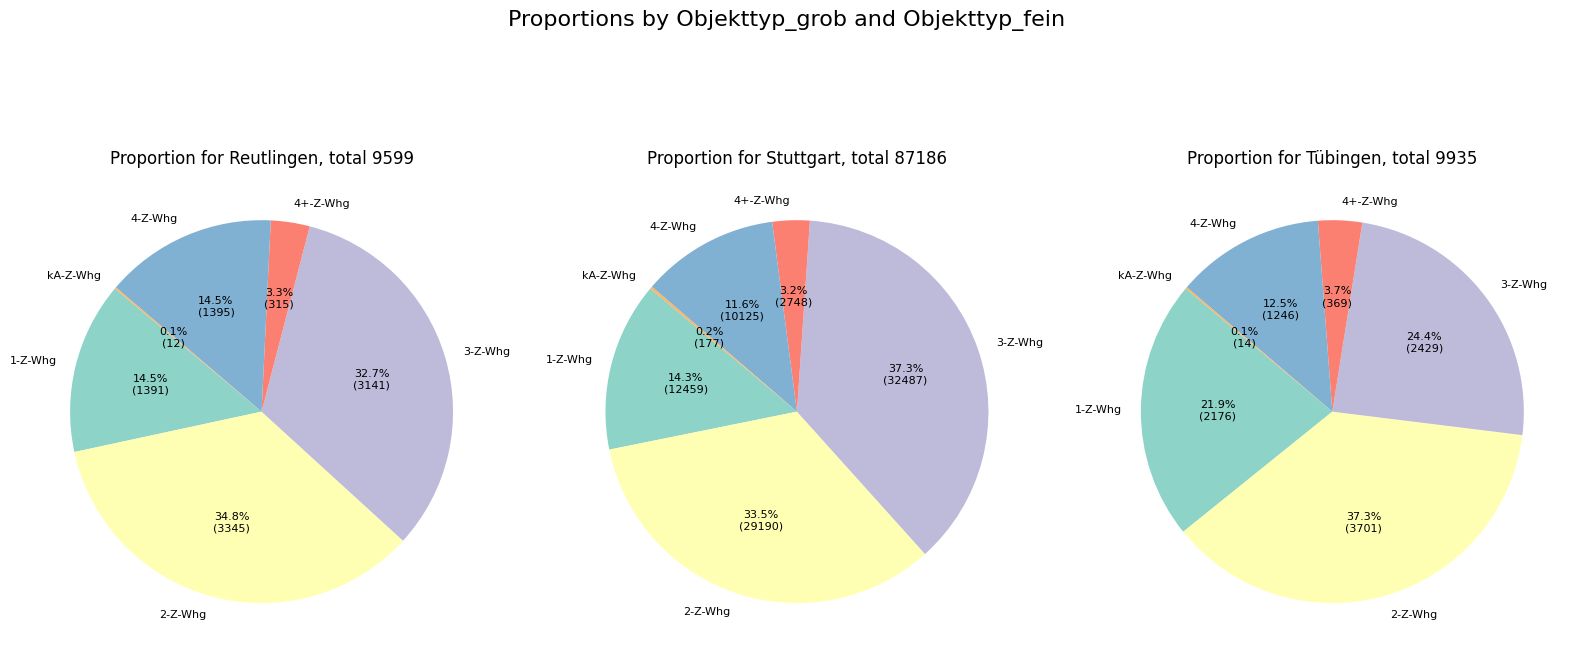

In [12]:
grouped_df = df.groupby(["oadr_ort","objekttyp_grob", "objekttyp_fein"]).size().reset_index(name='count')
unique_grobs = grouped_df['oadr_ort'].unique()
fig, axes = plt.subplots(1, len(unique_grobs), figsize=(16, 8), subplot_kw=dict(aspect="equal"))
subtitle_text = ""
colors = plt.cm.Set3.colors  # Set color palette, adjust as needed

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


for i, (grob, ax) in enumerate(zip(unique_grobs, axes.flatten())):
    grob_df = grouped_df[grouped_df['oadr_ort'] == grob]
    wedges, texts, autotexts = ax.pie(grob_df['count'], labels=grob_df['objekttyp_fein'], autopct=lambda pct: func(pct, grob_df['count']),
                                      colors=colors, startangle=140)
    ax.set_title(f'Proportion for {grob}, total {grob_df["count"].sum()}')
    
    # Increase the size of the labels and percentage values for better visibility
    for text in texts + autotexts:
        text.set_fontsize(8)
    # subtitle_text += f"Total for {grob}: {grob_df['count'].sum()} \n \n"
    
fig.suptitle(f'{subtitle_text}\n', fontsize=16, style='italic')
fig.suptitle('Proportions by Objekttyp_grob and Objekttyp_fein', fontsize=16)
fig.tight_layout()
plt.show()